In [7]:
stock_ret=0.1
rf=0.03
stock_weight=0.5
portfolio_ret=rf*(1-stock_weight)+stock_ret*stock_weight
portfolio_ret

0.065

In [9]:
portfolio_initial_value=1000
portfolio_end_values=portfolio_initial_value*(1+portfolio_ret)
portfolio_end_values

1065.0

In [12]:
def port_end_value(stock_ret=0.1,rf=0.03,stock_weight=0.5,portfolio_initial_value=100):
    portfolio_ret=rf*(1-stock_weight)+stock_ret*stock_weight
    portfolio_end_value=portfolio_initial_value*(1+portfolio_ret)
    return portfolio_end_value
port_end_value()

106.5

In [13]:
port_end_value(0.05,0.03,0.7)

104.4

In [24]:
import random
stock_mean=0.1
stock_std=0.2
random.normalvariate(stock_mean,stock_std)

-0.029136257630903856

In [30]:
stock_ret=random.normalvariate(stock_mean,stock_std)
print(f'running with stock return {stock_ret: .1%}')
port_end_value(stock_ret)

running with stock return  29.3%


116.16504145834865

In [34]:
n_iter=5
outputs=[]
for i in range(n_iter):
    stock_ret=random.normalvariate(stock_mean,stock_std)
    result=port_end_value(stock_ret)
    outputs.append(result)
outputs

[100.58130161073512,
 111.8402683377858,
 93.38462798062915,
 105.82729761865633,
 108.47860384237704]

In [72]:
def port_end_value_simulations(stock_mean=0.1,stock_std=0.2,stock_weights=0.5,n_iter=1000):
    outputs=[]
    for i in range(n_iter):
        stock_ret=random.normalvariate(stock_mean,stock_std)
        result=port_end_value(stock_ret,stock_weight=stock_weight)
        outputs.append(result)
    return outputs

In [73]:
results=port_end_value_simulations()
print(f'There are {len(results)} results. First fivez:')
results[:5]

There are 1000 results. First fivez:


[83.0600686648968,
 107.94646234839229,
 104.92249865376797,
 114.9212970761821,
 123.04277235425415]

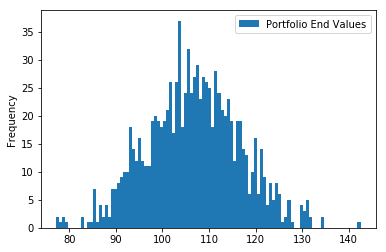

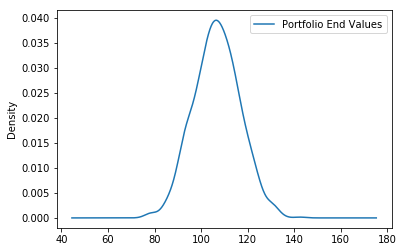

In [74]:
%matplotlib inline
import pandas as pd
df=pd.DataFrame()
df['Portfolio End Values']=results
df.plot.hist(bins=100)
df.plot.kde()

In [75]:
percentile=[i/20 for i in range(1,20)]
percentile

[0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

In [76]:
df['Portfolio End Values'].quantile(percentile)

0.05     90.731478
0.10     93.596364
0.15     95.990648
0.20     98.233850
0.25     99.999755
0.30    101.537507
0.35    103.091036
0.40    104.140342
0.45    105.624422
0.50    106.701185
0.55    107.864053
0.60    109.195607
0.65    110.451609
0.70    111.899635
0.75    113.357166
0.80    114.912313
0.85    117.008877
0.90    119.782874
0.95    123.053550
Name: Portfolio End Values, dtype: float64

In [77]:
df.quantile(percentile)

,Portfolio End Values
0.05,90.731478
0.10,93.596364
0.15,95.990648
0.20,98.233850
0.25,99.999755
0.30,101.537507
0.35,103.091036
0.40,104.140342
0.45,105.624422
0.50,106.701185


In [78]:
df['Portfolio End Values']>=105

0      False
1       True
2      False
3       True
4       True
       ...  
995     True
996    False
997     True
998     True
999    False
Name: Portfolio End Values, Length: 1000, dtype: bool

In [79]:
(df['Portfolio End Values']>=105).astype(int)

0      0
1      1
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    0
Name: Portfolio End Values, Length: 1000, dtype: int32

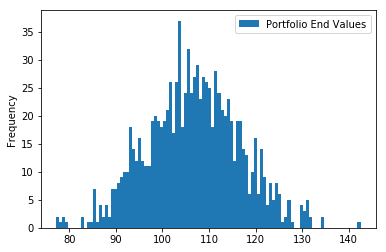

Probability Table
0.05     $90.731478
0.10     $93.596364
0.15     $95.990648
0.20     $98.233850
0.25     $99.999755
0.30    $101.537507
0.35    $103.091036
0.40    $104.140342
0.45    $105.624422
0.50    $106.701185
0.55    $107.864053
0.60    $109.195607
0.65    $110.451609
0.70    $111.899635
0.75    $113.357166
0.80    $114.912313
0.85    $117.008877
0.90    $119.782874
0.95    $123.053550
Name: Portfolio End Values, dtype: object

Probability of getting $105 in cash:56.9%



In [80]:
import matplotlib.pyplot as plt

def create_data_frame_from_results(results):
    df=pd.DataFrame()
    df['Portfolio End Values']=results
    return df

def visualize_results(df):
    df.plot.hist(bins=100)
    plt.show()

def probability_table(df):
    percentiles=[i/20 for i in range(1,20)]
    return df['Portfolio End Values'].quantile(percentiles)

def probability_of_objective(df,desired_cash=105):
    return(df['Portfolio End Values']>=desired_cash).astype(int).mean()

def model_outputs(results,desired_cash=105):
    df=create_data_frame_from_results(results)
    visualize_results(df)
    prob_table=probability_table(df)
    prob_objective=probability_of_objective(df,desired_cash=desired_cash)
    return prob_table,prob_objective

def display_model_summary(results,desired_cash=105):
    prob_table,prob_objective=model_outputs(results,desired_cash=desired_cash)
    print('Probability Table')
    print(prob_table.apply(lambda x: f'${x:2f}'))
    print('')
    print(f'Probability of getting ${desired_cash:,.0f} in cash:{prob_objective:.1%}')
    print('')
    
display_model_summary(results)

In [81]:
weights=[i/10 for i in range(1,10)]
weights

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

Results with 10% in the Stocks


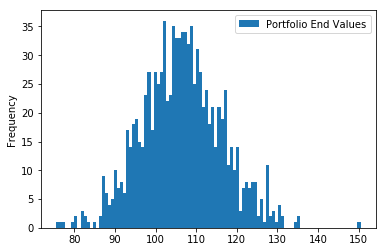

Probability Table
0.05     $90.725017
0.10     $94.228091
0.15     $96.371254
0.20     $98.259087
0.25     $99.973226
0.30    $101.467244
0.35    $102.608307
0.40    $104.099902
0.45    $105.273878
0.50    $106.376201
0.55    $107.473765
0.60    $108.555782
0.65    $109.857784
0.70    $111.064539
0.75    $112.781637
0.80    $114.663968
0.85    $116.679803
0.90    $118.961650
0.95    $123.793012
Name: Portfolio End Values, dtype: object

Probability of getting $105 in cash:55.9%

Results with 20% in the Stocks


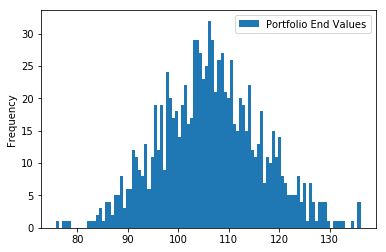

Probability Table
0.05     $90.322997
0.10     $93.538290
0.15     $96.065981
0.20     $97.994994
0.25     $99.533094
0.30    $101.221585
0.35    $102.935371
0.40    $103.936358
0.45    $105.160188
0.50    $106.254805
0.55    $107.267750
0.60    $108.548101
0.65    $109.883357
0.70    $111.370149
0.75    $112.903614
0.80    $114.688574
0.85    $117.030493
0.90    $119.669907
0.95    $123.623967
Name: Portfolio End Values, dtype: object

Probability of getting $105 in cash:55.1%

Results with 30% in the Stocks


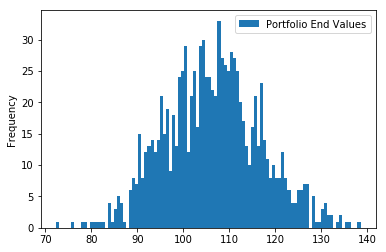

Probability Table
0.05     $90.417690
0.10     $93.043825
0.15     $95.255146
0.20     $97.489154
0.25     $99.314103
0.30    $100.622102
0.35    $102.263064
0.40    $103.798345
0.45    $105.039841
0.50    $106.329305
0.55    $107.738586
0.60    $108.885416
0.65    $110.261726
0.70    $111.413994
0.75    $112.940483
0.80    $115.359844
0.85    $117.142064
0.90    $119.993071
0.95    $124.435651
Name: Portfolio End Values, dtype: object

Probability of getting $105 in cash:55.2%

Results with 40% in the Stocks


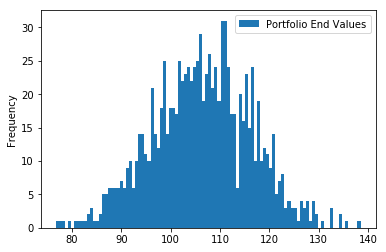

Probability Table
0.05     $89.656142
0.10     $93.508116
0.15     $96.032820
0.20     $98.027414
0.25     $99.548990
0.30    $101.382577
0.35    $102.622249
0.40    $103.982152
0.45    $105.366728
0.50    $106.456020
0.55    $107.810153
0.60    $109.202898
0.65    $110.352097
0.70    $111.542941
0.75    $113.030121
0.80    $115.208759
0.85    $116.802723
0.90    $119.031556
0.95    $122.234839
Name: Portfolio End Values, dtype: object

Probability of getting $105 in cash:56.0%

Results with 50% in the Stocks


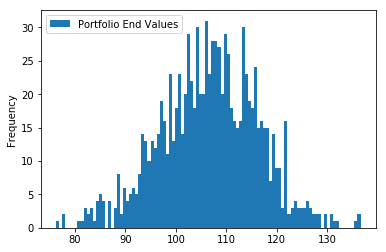

Probability Table
0.05     $90.158962
0.10     $94.270936
0.15     $96.516439
0.20     $98.582482
0.25    $100.198435
0.30    $101.886828
0.35    $103.165157
0.40    $104.449480
0.45    $105.832210
0.50    $106.986290
0.55    $108.039420
0.60    $109.193742
0.65    $110.387496
0.70    $112.028438
0.75    $113.566265
0.80    $114.913049
0.85    $116.489764
0.90    $118.339655
0.95    $121.803143
Name: Portfolio End Values, dtype: object

Probability of getting $105 in cash:57.6%

Results with 60% in the Stocks


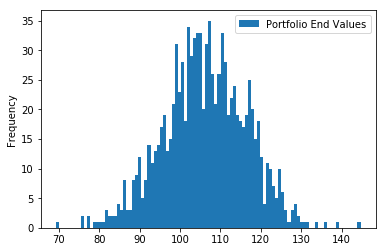

Probability Table
0.05     $89.270712
0.10     $92.933095
0.15     $95.724394
0.20     $98.114894
0.25     $99.637336
0.30    $101.065258
0.35    $102.438105
0.40    $103.702685
0.45    $104.876263
0.50    $106.295002
0.55    $107.476166
0.60    $108.896988
0.65    $110.343007
0.70    $111.585598
0.75    $113.347545
0.80    $115.298739
0.85    $117.049772
0.90    $119.191975
0.95    $122.587206
Name: Portfolio End Values, dtype: object

Probability of getting $105 in cash:54.5%

Results with 70% in the Stocks


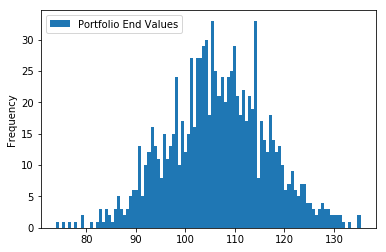

Probability Table
0.05     $90.478876
0.10     $93.310924
0.15     $95.823520
0.20     $98.109553
0.25     $99.869772
0.30    $101.717676
0.35    $102.991397
0.40    $104.215409
0.45    $105.392253
0.50    $106.377664
0.55    $107.781612
0.60    $109.183561
0.65    $110.348790
0.70    $111.768894
0.75    $113.431122
0.80    $114.571313
0.85    $117.003724
0.90    $119.132843
0.95    $123.113899
Name: Portfolio End Values, dtype: object

Probability of getting $105 in cash:55.9%

Results with 80% in the Stocks


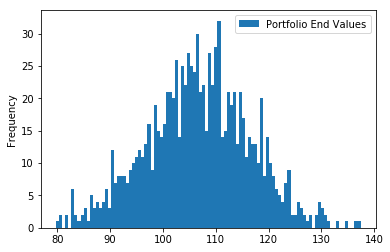

Probability Table
0.05     $90.236945
0.10     $93.821399
0.15     $96.469426
0.20     $98.608560
0.25    $100.364235
0.30    $101.827188
0.35    $103.212410
0.40    $104.518131
0.45    $105.607498
0.50    $106.688153
0.55    $108.004174
0.60    $109.408952
0.65    $110.483327
0.70    $111.963996
0.75    $113.348878
0.80    $115.036607
0.85    $117.045423
0.90    $119.249225
0.95    $122.755513
Name: Portfolio End Values, dtype: object

Probability of getting $105 in cash:57.9%

Results with 90% in the Stocks


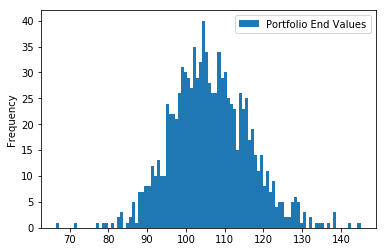

Probability Table
0.05     $90.865511
0.10     $94.639464
0.15     $96.305809
0.20     $98.178727
0.25     $99.501054
0.30    $100.756386
0.35    $102.111063
0.40    $103.403303
0.45    $104.492396
0.50    $105.642345
0.55    $106.980366
0.60    $108.463864
0.65    $109.678045
0.70    $111.034909
0.75    $112.761502
0.80    $114.633226
0.85    $116.277247
0.90    $119.080213
0.95    $122.933406
Name: Portfolio End Values, dtype: object

Probability of getting $105 in cash:52.7%



In [85]:
for weight in weights:
    print(f'Results with {weight:.0%} in the Stocks')
    results=port_end_value_simulations(stock_weights=weight)
    display_model_summary(results)